In [1]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
import pandas as pd
import numpy as np
import tqdm, datetime, pickle
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader

import ngboost as ngb

from sklearn import datasets

import plotnine
from plotnine import *

import matplotlib.pyplot as plt
import seaborn as sns

# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten

In [2]:
data_train = pd.read_csv("preprocessedDataset/pre1.csv")
numerical_category_fewValues = [
    "homeOwnership", 
    "verificationStatus",
    "initialListStatus",
    "applicationType",
    "n11",
    "n12",
]
numerical_category_manyValues = [
    "regionCode",
    "employmentTitle",
    "purpose",
    "postCode",
    "title",
]
date_type = [
    'issueDate',
    'earliesCreditLine',
    'issueDateDT',
    'earliesCreditLineDT',
    'earliesCreditLineYear',
    'earliesCreditLineMonth',
    'issueYear',
    'issueMonth'
]
numerical_serial = [
    "loanAmnt","interestRate","installment","annualIncome","dti","delinquency_2years","ficoRangeLow","ficoRangeHigh","openAcc",
    "pubRec","pubRecBankruptcies","revolBal","revolUtil","totalAcc","n0","n1","n2","n3",
    "n4","n5","n6","n7","n8","n9","n10","n13","n14",
    "term", 
]
object_serial = [
    "grade",
    "subGrade", 
    "employmentLength"
]

In [3]:
features = [f for f in data_train.columns if f not in ['id', 'isDefault', "policyCode", "issueDate", "earliesCreditLine"] and '_outliers' not in f]
features

['loanAmnt',
 'term',
 'interestRate',
 'installment',
 'grade',
 'subGrade',
 'employmentTitle',
 'employmentLength',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14',
 'issueYear',
 'issueMonth',
 'earliesCreditLineYear',
 'earliesCreditLineMonth',
 'issueDateDT',
 'earliesCreditLineDT']

In [4]:
len(features)

48

# 看看各个模型的特征的重要性

In [5]:
## 载回来模型
## 打出特征重要性
## 对比各个模型topK重要的特征，有无重叠。
## 观察这些特征的分布有何变化。

## 看第一个模型

In [6]:
xgb_model = xgb.Booster()
xgb_model.load_model("trainedModel/xgb.json")

In [10]:
iptc_scores = xgb_model.get_score(importance_type="weight")
importances = []
for i in range(len(iptc_scores)):
    importances.append((features[i], iptc_scores[f"f{i}"]))
print(importances)

[('loanAmnt', 279.0), ('term', 99.0), ('interestRate', 326.0), ('installment', 405.0), ('grade', 60.0), ('subGrade', 168.0), ('employmentTitle', 413.0), ('employmentLength', 193.0), ('homeOwnership', 127.0), ('annualIncome', 483.0), ('verificationStatus', 55.0), ('purpose', 94.0), ('postCode', 416.0), ('regionCode', 308.0), ('dti', 522.0), ('delinquency_2years', 46.0), ('ficoRangeLow', 243.0), ('ficoRangeHigh', 41.0), ('openAcc', 136.0), ('pubRec', 30.0), ('pubRecBankruptcies', 30.0), ('revolBal', 506.0), ('revolUtil', 418.0), ('totalAcc', 247.0), ('initialListStatus', 16.0), ('applicationType', 16.0), ('title', 171.0), ('n0', 69.0), ('n1', 77.0), ('n2', 138.0), ('n3', 27.0), ('n4', 115.0), ('n5', 138.0), ('n6', 211.0), ('n7', 112.0), ('n8', 147.0), ('n9', 105.0), ('n10', 88.0), ('n11', 40.0), ('n12', 5.0), ('n13', 38.0), ('n14', 146.0), ('issueYear', 61.0), ('issueMonth', 133.0), ('earliesCreditLineYear', 118.0), ('earliesCreditLineMonth', 131.0), ('issueDateDT', 498.0), ('earliesCred

In [13]:
importances.sort(key=lambda x: x[1], reverse=True)

{'f0': 6448.12451171875,
 'f1': 11195.53125,
 'f2': 9621.7607421875,
 'f3': 7699.3125,
 'f4': 55231.9609375,
 'f5': 65446.22265625,
 'f6': 5889.23681640625,
 'f7': 4850.93017578125,
 'f8': 7598.779296875,
 'f9': 9826.2578125,
 'f10': 991.3743896484375,
 'f11': 1089.248291015625,
 'f12': 5211.89697265625,
 'f13': 4680.6123046875,
 'f14': 11062.994140625,
 'f15': 661.503662109375,
 'f16': 6684.41259765625,
 'f17': 892.2213745117188,
 'f18': 1539.60302734375,
 'f19': 423.0745849609375,
 'f20': 385.1983337402344,
 'f21': 8511.4599609375,
 'f22': 5221.64404296875,
 'f23': 3272.8525390625,
 'f24': 178.6141357421875,
 'f25': 209.86859130859375,
 'f26': 2731.55615234375,
 'f27': 897.3029174804688,
 'f28': 869.5144653320312,
 'f29': 3983.014404296875,
 'f30': 820.5599975585938,
 'f31': 1444.63916015625,
 'f32': 1778.4495849609375,
 'f33': 3069.72216796875,
 'f34': 1258.7452392578125,
 'f35': 1993.488037109375,
 'f36': 1973.67333984375,
 'f37': 1183.4654541015625,
 'f38': 1484.2349853515625,
 'f

In [14]:
importances

[('dti', 522.0),
 ('revolBal', 506.0),
 ('issueDateDT', 498.0),
 ('annualIncome', 483.0),
 ('revolUtil', 418.0),
 ('postCode', 416.0),
 ('employmentTitle', 413.0),
 ('installment', 405.0),
 ('earliesCreditLineDT', 353.0),
 ('interestRate', 326.0),
 ('regionCode', 308.0),
 ('loanAmnt', 279.0),
 ('totalAcc', 247.0),
 ('ficoRangeLow', 243.0),
 ('n6', 211.0),
 ('employmentLength', 193.0),
 ('title', 171.0),
 ('subGrade', 168.0),
 ('n8', 147.0),
 ('n14', 146.0),
 ('n2', 138.0),
 ('n5', 138.0),
 ('openAcc', 136.0),
 ('issueMonth', 133.0),
 ('earliesCreditLineMonth', 131.0),
 ('homeOwnership', 127.0),
 ('earliesCreditLineYear', 118.0),
 ('n4', 115.0),
 ('n7', 112.0),
 ('n9', 105.0),
 ('term', 99.0),
 ('purpose', 94.0),
 ('n10', 88.0),
 ('n1', 77.0),
 ('n0', 69.0),
 ('issueYear', 61.0),
 ('grade', 60.0),
 ('verificationStatus', 55.0),
 ('delinquency_2years', 46.0),
 ('ficoRangeHigh', 41.0),
 ('n11', 40.0),
 ('n13', 38.0),
 ('pubRec', 30.0),
 ('pubRecBankruptcies', 30.0),
 ('n3', 27.0),
 ('init

In [10]:
23*279

6417

In [8]:
xgb_model.get_score(importance_type="weight")

{'f0': 279.0,
 'f1': 99.0,
 'f2': 326.0,
 'f3': 405.0,
 'f4': 60.0,
 'f5': 168.0,
 'f6': 413.0,
 'f7': 193.0,
 'f8': 127.0,
 'f9': 483.0,
 'f10': 55.0,
 'f11': 94.0,
 'f12': 416.0,
 'f13': 308.0,
 'f14': 522.0,
 'f15': 46.0,
 'f16': 243.0,
 'f17': 41.0,
 'f18': 136.0,
 'f19': 30.0,
 'f20': 30.0,
 'f21': 506.0,
 'f22': 418.0,
 'f23': 247.0,
 'f24': 16.0,
 'f25': 16.0,
 'f26': 171.0,
 'f27': 69.0,
 'f28': 77.0,
 'f29': 138.0,
 'f30': 27.0,
 'f31': 115.0,
 'f32': 138.0,
 'f33': 211.0,
 'f34': 112.0,
 'f35': 147.0,
 'f36': 105.0,
 'f37': 88.0,
 'f38': 40.0,
 'f39': 5.0,
 'f40': 38.0,
 'f41': 146.0,
 'f42': 61.0,
 'f43': 133.0,
 'f44': 118.0,
 'f45': 131.0,
 'f46': 498.0,
 'f47': 353.0}

## 看第二个模型

In [9]:
xgb_model.get_score(importance_type="gain")

{'f0': 23.111557006835938,
 'f1': 113.08617401123047,
 'f2': 29.514602661132812,
 'f3': 19.010648727416992,
 'f4': 920.5326538085938,
 'f5': 389.56085205078125,
 'f6': 14.259653091430664,
 'f7': 25.134353637695312,
 'f8': 59.832908630371094,
 'f9': 20.344219207763672,
 'f10': 18.024988174438477,
 'f11': 11.587747573852539,
 'f12': 12.52859878540039,
 'f13': 15.196793556213379,
 'f14': 21.1934757232666,
 'f15': 14.380514144897461,
 'f16': 27.507871627807617,
 'f17': 21.761497497558594,
 'f18': 11.320610046386719,
 'f19': 14.102486610412598,
 'f20': 12.839944839477539,
 'f21': 16.821067810058594,
 'f22': 12.491971015930176,
 'f23': 13.250414848327637,
 'f24': 11.163383483886719,
 'f25': 13.11678695678711,
 'f26': 15.97401237487793,
 'f27': 13.004389762878418,
 'f28': 11.29239559173584,
 'f29': 28.862422943115234,
 'f30': 30.391111373901367,
 'f31': 12.562079429626465,
 'f32': 12.88731575012207,
 'f33': 14.548446655273438,
 'f34': 11.238797187805176,
 'f35': 13.561142921447754,
 'f36': 18

In [5]:
cat_model = CatBoostClassifier() # parameters not required.
cat_model.load_model('trainedModel/cat.json')

In [19]:
iptc_scores = cat_model.get_feature_importance()
importances1 = []
for i in range(len(iptc_scores)):
    importances1.append((features[i], iptc_scores[i]))
importances1.sort(key=lambda x: x[1], reverse=True)
importances1

[('interestRate', 8.544284567479268),
 ('subGrade', 8.455588622847726),
 ('issueDateDT', 7.292582446550343),
 ('grade', 6.8886481397303845),
 ('term', 6.766828342784674),
 ('dti', 4.547846794904137),
 ('revolBal', 3.9271204264193305),
 ('annualIncome', 3.838212889522154),
 ('homeOwnership', 3.8064945918046322),
 ('loanAmnt', 3.1377419383371126),
 ('installment', 2.7116562373655464),
 ('ficoRangeLow', 2.700264715543778),
 ('n14', 2.432823652116279),
 ('employmentLength', 2.2092957418962604),
 ('regionCode', 2.197072701138165),
 ('revolUtil', 2.106320217772542),
 ('earliesCreditLineDT', 2.0400492335430647),
 ('employmentTitle', 2.035281632571486),
 ('ficoRangeHigh', 1.9907445362869305),
 ('postCode', 1.8732479098769317),
 ('n6', 1.5954844967735338),
 ('totalAcc', 1.5195593697529897),
 ('issueYear', 1.4290790536061346),
 ('n9', 1.333984232767719),
 ('title', 1.220950701468404),
 ('n3', 1.1762135764196455),
 ('verificationStatus', 1.1184680861228542),
 ('issueMonth', 0.9729774099889283),
 

## 对比一下

In [24]:
feas1 = [_[0] for _ in importances[:10]]
feas2 = [_[0] for _ in importances1[:10]]

In [25]:
feas1, feas2

(['dti',
  'revolBal',
  'issueDateDT',
  'annualIncome',
  'revolUtil',
  'postCode',
  'employmentTitle',
  'installment',
  'earliesCreditLineDT',
  'interestRate'],
 ['interestRate',
  'subGrade',
  'issueDateDT',
  'grade',
  'term',
  'dti',
  'revolBal',
  'annualIncome',
  'homeOwnership',
  'loanAmnt'])

In [26]:
itsct = set(feas1).intersection(set(feas2))
itsct

{'annualIncome', 'dti', 'interestRate', 'issueDateDT', 'revolBal'}

# 看看这些特征的分布的变化

我们先尝试一下对单个特征进行观察。

## 密度图

No handles with labels found to put in legend.


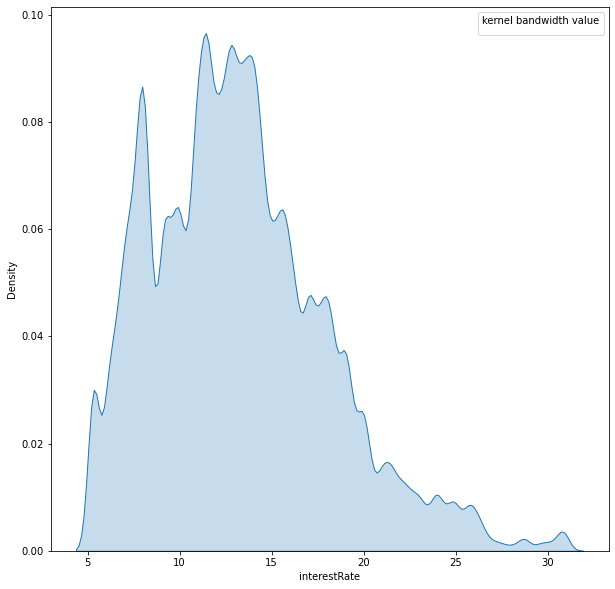

In [34]:
df = data_train
fea = "interestRate"

plt.figure(figsize = (10, 10))
sns.kdeplot(df[fea], shade=True)
plt.legend(title="kernel bandwidth value")
plt.show()

100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  3.34it/s]


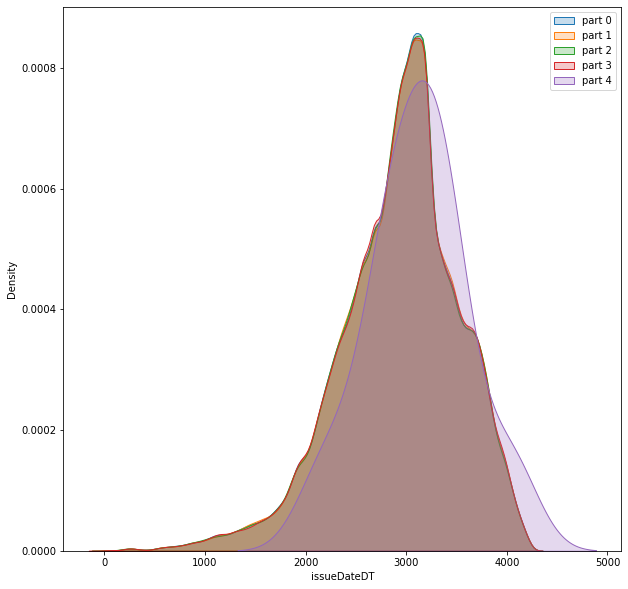

In [41]:
## 
fea = "issueDateDT"
df = data_train

plt.figure(figsize = (10, 10))
n_batches = 4
nrow_interval = df.shape[0] // n_batches - 5 ## 把原来的数据分成5份，然后逐份来做预测。否则实在太久。
legends = []
for i in tqdm.tqdm(range(n_batches + 1)):
    if i == n_batches:
        part_data = df.loc[i*nrow_interval:, :]
    else:
        part_data = df.loc[i*nrow_interval: (i+1)*nrow_interval - 1, :] ## 用loc来切片，“行”这一维度，竟然是上下限都保留！！
    legends.append(f"part {i}")
    sns.kdeplot(part_data[fea], shade=True)
plt.legend(legends)
plt.show()

## 柱状图

因为分布图看着有些糊涂，都挤在一起。所以我们可以考虑用柱状图分开展示。

可以用sns的hue来做。

In [5]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
## 
fea = "issueDateDT"
df = data_train

n_bins = 20
enc = KBinsDiscretizer(n_bins=n_bins)
binned_rst_list = []

## 把原来的数据分成5份，然后逐份来做。
n_batches = 4
nrow_interval = df.shape[0] // n_batches - 5 
for i in tqdm.tqdm(range(n_batches + 1)):
    if i == n_batches:
        part_data = df.loc[i*nrow_interval:, :]
        print("we are here")
    else:
        part_data = df.loc[i*nrow_interval: (i+1)*nrow_interval - 1, :] ## 用loc来切片，“行”这一维度，竟然是上下限都保留！！
    print(part_data.shape)
    ## 这里我们来实际搞事情：
    if i == 0:
        X_binned = enc.fit_transform(part_data[[fea]])
    else:
        X_binned = enc.transform(part_data[[fea]])
    print("here we are 1")
    tmp_df = pd.DataFrame(X_binned, columns=["binned_fea"])
    print("here we are 2")
    tmp_df1 = pd.DataFrame(tmp_df["binned_fea"].value_counts()).reset_index()
    print("here we are 3")
    tmp_df1.rename(columns={"index": "bin_num", "binned_fea": "bin_counts"}, inplace=True)
    print("here we are 4")
    tmp_df1.sort_values("bin_num", inplace=True)
    print("here we are 5")
    tmp_df1.reset_index(drop=True, inplace=True)
    print("here we are 6")
    tmp_df1["Month"] = f"Part_{i}"
    print("here we are 7")
    binned_rst_list.append(tmp_df1)
    print("here we are 8")

pd.concat(binned_rst_list)

  0%|                                                     | 0/5 [00:00<?, ?it/s]

(199995, 53)
here we are 1
here we are 2


/Users/minkexiu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:862: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
